## 1. Time Series Classification Part 1: Feature Creation/Extraction

Package imports

In [189]:
import pandas as pd
import numpy as np
from scipy.stats import bootstrap
import glob
import os
from copy import deepcopy
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from statistics import mean
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Get the AReM Data Set

In [190]:
col_names = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
df = pd.read_csv('../data/AReM/cycling/dataset4.csv', sep=r',| ', skiprows=5, names=col_names, engine='python')

test_list = [os.path.join('../data/AReM/bending1', 'dataset1.csv') , os.path.join('../data/AReM/bending1', 'dataset2.csv'), 
             os.path.join('../data/AReM/bending2', 'dataset1.csv'), os.path.join('../data/AReM/bending2', 'dataset2.csv'), 
             os.path.join('../data/AReM/cycling', 'dataset1.csv'), os.path.join('../data/AReM/cycling', 'dataset2.csv'), os.path.join('../data/AReM/cycling', 'dataset3.csv'),
             os.path.join('../data/AReM/lying', 'dataset1.csv'), os.path.join('../data/AReM/lying', 'dataset2.csv'), os.path.join('../data/AReM/lying', 'dataset3.csv'),
             os.path.join('../data/AReM/sitting', 'dataset1.csv'), os.path.join('../data/AReM/sitting', 'dataset2.csv'), os.path.join('../data/AReM/sitting', 'dataset3.csv'),
             os.path.join('../data/AReM/standing', 'dataset1.csv'), os.path.join('../data/AReM/standing', 'dataset2.csv'), os.path.join('../data/AReM/standing', 'dataset3.csv'),
             os.path.join('../data/AReM/walking', 'dataset1.csv'), os.path.join('../data/AReM/walking', 'dataset2.csv'), os.path.join('../data/AReM/walking', 'dataset3.csv')]

dir_type_list = {'../data/AReM/bending1': 0, 
                 '../data/AReM/bending2': 0, 
                 '../data/AReM/cycling': 1, 
                 '../data/AReM/lying': 2, 
                 '../data/AReM/sitting': 3, 
                 '../data/AReM/standing': 4, 
                 '../data/AReM/walking': 5}

time_data = pd.DataFrame({'mean1':[],'std1':[],'min1':[],'first_quartile1':[],"median1":[],'third_quartile1':[],'max1':[],
            'mean2':[],'std2':[],'min2':[],'first_quartile2':[],"median2":[],'third_quartile2':[],'max2':[],
            'mean3':[],'std3':[],'min3':[],'first_quartile3':[],"median3":[],'third_quartile3':[],'max3':[],
            'mean4':[],'std4':[],'min4':[],'first_quartile4':[],"median4":[],'third_quartile4':[],'max4':[],
            'mean5':[],'std5':[],'min5':[],'first_quartile5':[],"median5":[],'third_quartile5':[],'max5':[],
            'mean6':[],'std6':[],'min6':[],'first_quartile6':[],"median6":[],'third_quartile6':[],'max6':[],
            'label':[], 'data_type':[]})

for dir, label in dir_type_list.items():
    for filename in glob.glob(os.path.join(dir, "*.csv")):
        if filename in test_list:
            data_type = 'test'
        else:
            data_type = 'train'
        cur_df = pd.read_csv(filename, sep=r',| ', skiprows=5, names=col_names, engine='python').describe().drop_duplicates().dropna().drop('count', axis=0).drop('time', axis=1).transpose()
    
        val_list = cur_df.values.tolist()
        reshape_list = []
        for val in val_list:
            reshape_list.extend(val)
        reshape_list.extend([label, data_type])
        time_data.loc[len(time_data)] = reshape_list
        
#display(time_data)

cur_data = time_data.iloc[:, :-2]
data_for_bootstrap = cur_data.transpose().to_numpy()
feature_names = ['mean1','std1','min1','first_quartile1',"median1",'third_quartile1','max1',
                'mean2','std2','min2','first_quartile2',"median2",'third_quartile2','max2',
                'mean3','std3','min3','first_quartile3',"median3",'third_quartile3','max3',
                'mean4','std4','min4','first_quartile4',"median4",'third_quartile4','max4',
                'mean5','std5','min5','first_quartile5',"median5",'third_quartile5','max5',
                'mean6','std6','min6','first_quartile6',"median6",'third_quartile6','max6']
CI_data = pd.DataFrame({'feature':[], 'STD':[], '90% Bootstrap Low':[], '90% Bootstrap High':[], 'Confidence Interval':[]})
cur_data_std = cur_data.std()
for i, row in enumerate(data_for_bootstrap):
    cur_row = []
    bootstrap_ci = bootstrap((row,), np.std, confidence_level=0.90).confidence_interval
    cur_row = [feature_names[i], cur_data_std[i], bootstrap_ci[0], bootstrap_ci[1], bootstrap_ci[1] - bootstrap_ci[0]]
    CI_data.loc[len(CI_data)] = cur_row

#display(CI_data)

c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\scipy\stats\_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\scipy\stats\_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\scipy\stats\_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\scipy\stats\_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


## 2. Time Series Classification Part 2: Binary and Multiclass Classification

## (a) Binary Classification Using Logistic Regression

### (i) <br>
Feature select std, median, and first quartile by 1(c)iv

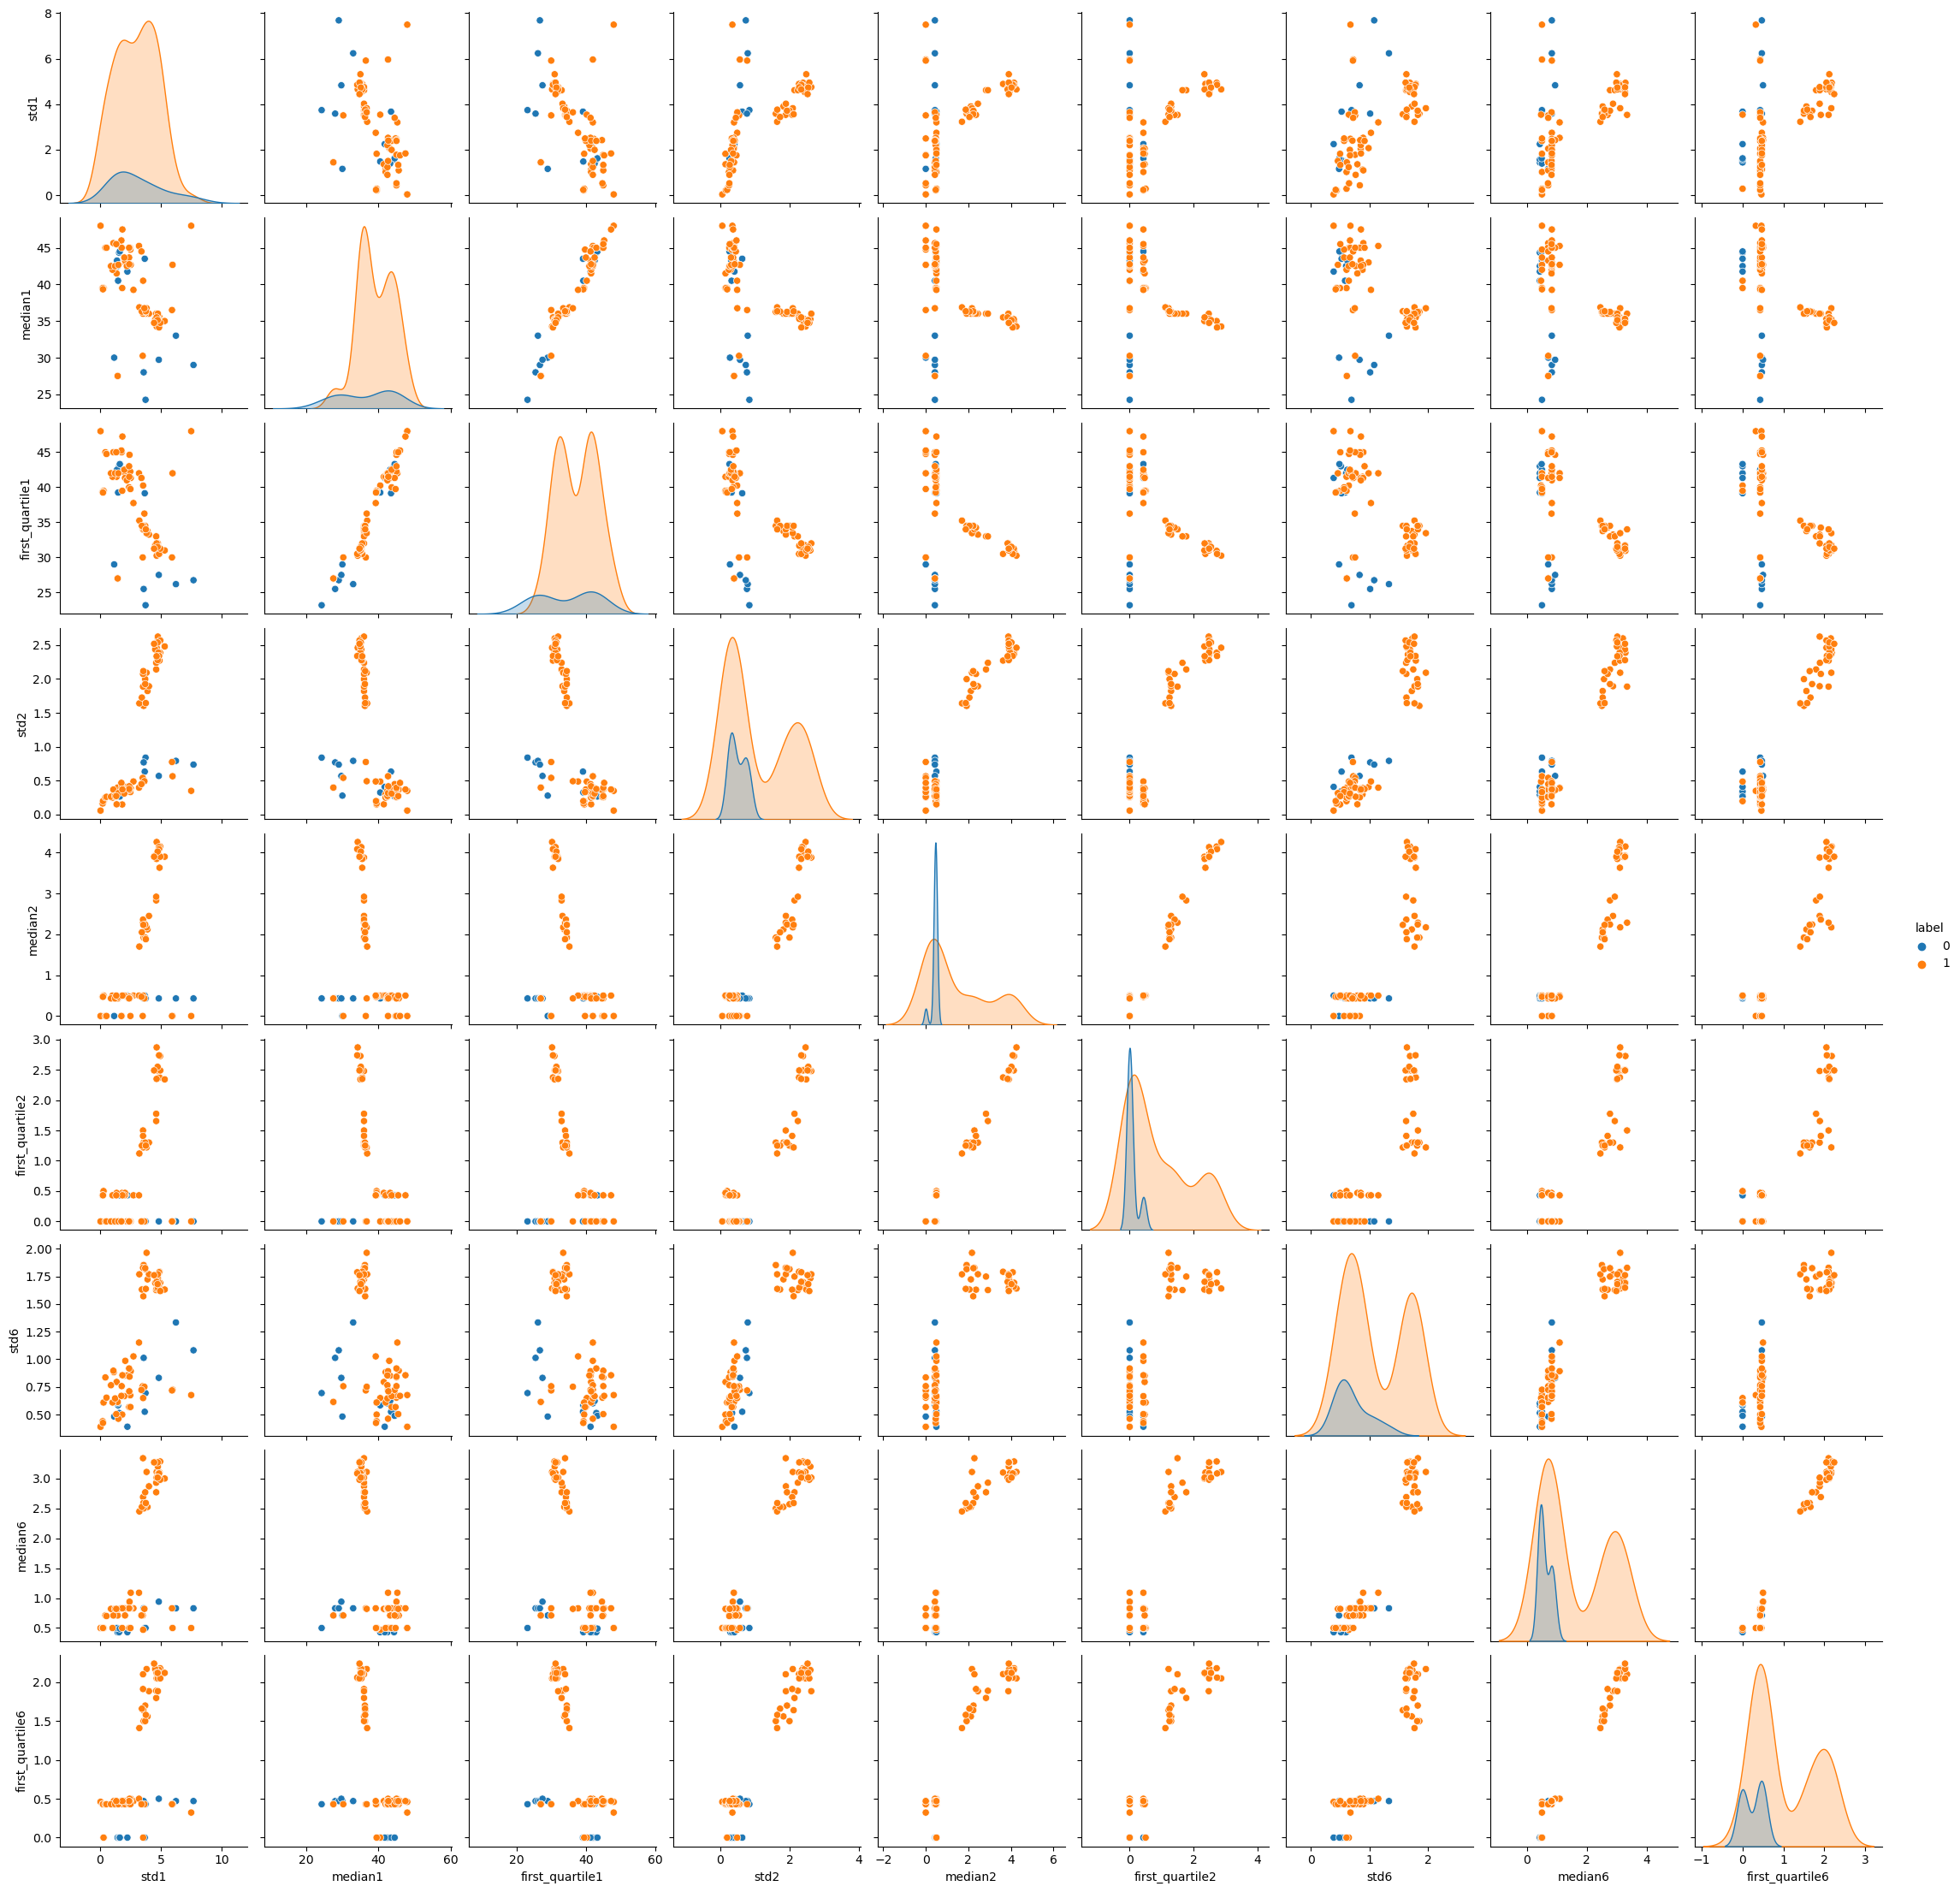

In [191]:
cur_data = time_data[['std1',"median1",'first_quartile1','std2',"median2",'first_quartile2','std6',"median6",'first_quartile6','label']]
updated = cur_data['label'] != 0
cur_data.loc[updated, 'label'] = 1
sns.pairplot(cur_data, hue="label")

### (ii)

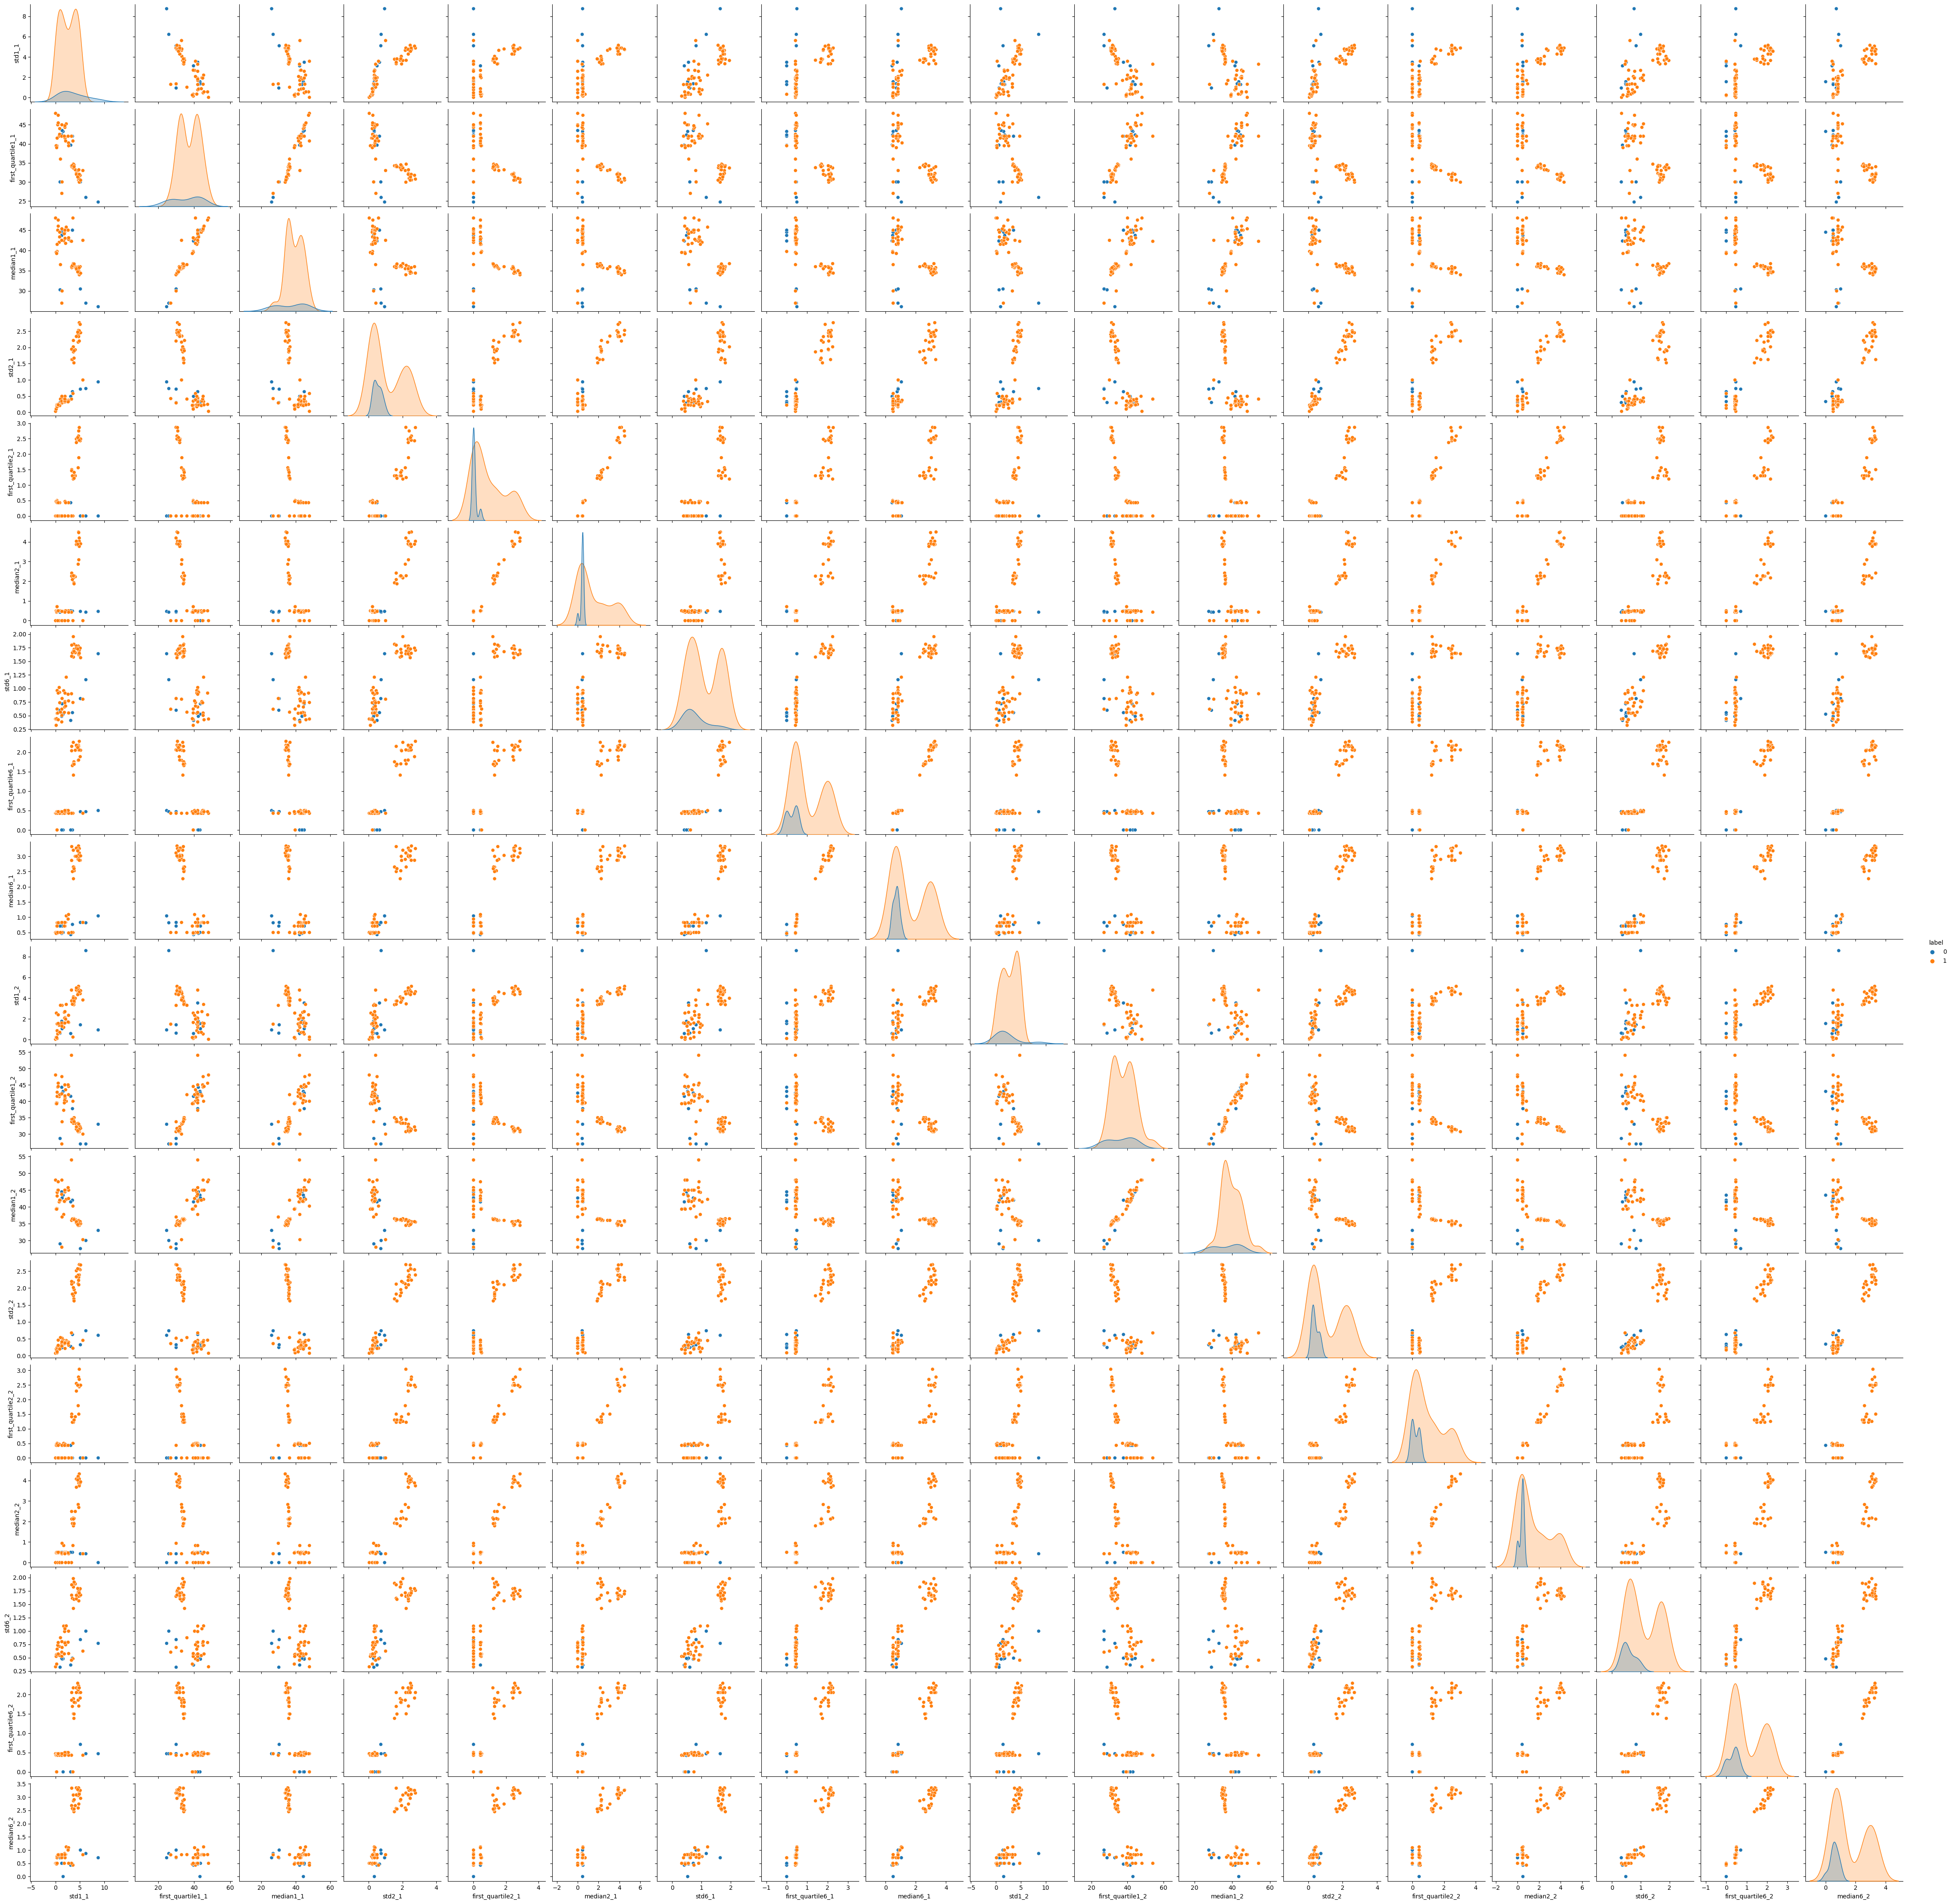

In [192]:
divide_amount = 2
select_cols = [0, 1, 5] #select 1, 2, 6 cols
cur_time_data = pd.DataFrame({'std1_1':[],'first_quartile1_1':[],"median1_1":[],
                          'std2_1':[],'first_quartile2_1':[],"median2_1":[],
                          'std6_1':[],'first_quartile6_1':[],"median6_1":[],
                          'std1_2':[],'first_quartile1_2':[],"median1_2":[],
                          'std2_2':[],'first_quartile2_2':[],"median2_2":[],
                          'std6_2':[],'first_quartile6_2':[],"median6_2":[],
                          'label':[], 'data_type':[]})

for dir, label in dir_type_list.items():
    for filename in glob.glob(os.path.join(dir, "*.csv")):
        cur_data_sample = []
        if filename in test_list:
            data_type = 'test'
        else:
            data_type = 'train'
        cur_df = pd.read_csv(filename, sep=r',| ', skiprows=5, names=col_names, engine='python').drop('time', axis=1).iloc[:, select_cols]
        row_size = len(cur_df)
        portion_size = row_size // 2
        start = 0
        while start < row_size:
            end = start + portion_size
            if end >= row_size:
                end = row_size
                if (end - start) / portion_size < 0.5:
                    break
            cur_portion = cur_df.iloc[start:end].describe().dropna().drop('count', axis=0).drop('max', axis=0).drop('min', axis=0).drop('mean', axis=0).drop('75%', axis=0).transpose().values.tolist()
            for l in cur_portion:
                cur_data_sample.extend(l)
            start = end
        if (label != 0): label = 1
        
        cur_data_sample.extend([label, data_type])
        cur_time_data.loc[len(cur_time_data)] = cur_data_sample
# Split DataFrame by data_type
grouped = cur_time_data.groupby(cur_time_data['data_type'] == 'train')
# Get subsets
train_data = grouped.get_group(True)
test_data = grouped.get_group(False)
show_train = train_data.drop('data_type', axis=1)
sns.pairplot(show_train, hue="label")

## Q: Do you see any considerable difference in the results with those of 2(a)i? <br>
Ans: Consider the top-left part(9X9) of this graph is the first half of our time series data features, and the bottom-right is the other half features. I would said based on the diaganal histogram, the first half features have more similar trend with 2(a)i, but the second half is more different. Espeacially for the first_quartile2_2 and the first_quartile6_2, the shape of label 'bending' look different.

## (iii)

In [193]:
def break_to_sets(set_amount, select_cols):
    train_dataset = []
    test_dataset = []
    
    for dir, label in dir_type_list.items():
        if label != 0: label = 1
        for filename in glob.glob(os.path.join(dir, "*.csv")):
            cur_data_sample = []
            if filename in test_list:
                data_type = 'test'
            else:
                data_type = 'train'
            cur_df = pd.read_csv(filename, sep=r',| ', skiprows=5, names=col_names, engine='python').drop('time', axis=1).iloc[:, select_cols]
            row_size = len(cur_df)
            portion_size = row_size // set_amount
            start = 0
            for _ in range(set_amount):
                end = start + portion_size
                if end > row_size:
                    end = row_size
                cur_portion = cur_df.iloc[start:end].describe().dropna().drop('count', axis=0).drop('max', axis=0).drop('min', axis=0).drop('mean', axis=0).drop('75%', axis=0).transpose().values.tolist()
                for features in cur_portion:
                    cur_data_sample.extend(features)
                    if len(features) != 3:
                        print(len(features))
                        print(features)
                        print(cur_portion)
                        display(cur_df.iloc[start:end])
                        display(cur_df.iloc[start:end].describe().transpose())
                start = end

            cur_data_sample.extend([label])
            if data_type == 'test':
                test_dataset.append(cur_data_sample)
            else:
                train_dataset.append(cur_data_sample)
                
    return np.array(train_dataset), np.array(test_dataset)

set_amounts = [i for i in range(1, 21, 1)]
select_cols = [0, 1, 5]
best_l = None
best_q = None
best_acc = float('-inf')
for set_amount in set_amounts:
    sample_size = len(select_cols) * 3 * set_amount
    train_dataset, test_dataset = break_to_sets(set_amount, select_cols)
    train_data, train_label = train_dataset[:, :-1], train_dataset[:, -1]
    
    # Recursive Feature Elimination --> decide the best q
    min_features_to_select = 1  
    clf = LogisticRegression(max_iter=1000)
    cv = StratifiedKFold(5)
    rfecv = RFECV(
        estimator=clf,
        step=1,
        cv=cv,
        scoring="accuracy",
        min_features_to_select=min_features_to_select,
    )
    rfecv.fit(train_data, train_label)
    cur_q = rfecv.n_features_
    cur_l = set_amount
    # Cross Validation --> analyze model
    skf = StratifiedKFold(n_splits=5)
    acc_stratified = []
    for train_index, test_index in skf.split(train_data, train_label):
        x_train_fold, x_test_fold = train_data[train_index], train_data[test_index]
        y_train_fold, y_test_fold = train_label[train_index], train_label[test_index]
        rfecv.fit(x_train_fold, y_train_fold)
        acc_stratified.append(rfecv.score(x_test_fold, y_test_fold))
    cur_acc = mean(acc_stratified)
    if cur_acc > best_acc:
        best_l = set_amount
        best_acc = cur_acc
        best_q = rfecv.n_features_
        print(set_amount, rfecv.n_features_)
        print(f"Current accuracy: {cur_acc}")
    

1 1
Current accuracy: 0.8417582417582418
2 1
Current accuracy: 0.8703296703296703
8 12
Current accuracy: 0.8989010989010989


## Q: What is the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. <br>
Ans: (8, 12)

## Q: Explain what the right way and the wrong way are to perform cross-validation in this problem <br>
Ans: Cross-validation is a method to analyze the model, for the model selection. So the right way would be using it to select our best model. On the other side, wrong way is use cross-validation to train a model. We should use whole training set for the model (selected by cross-validation).

## (iv)

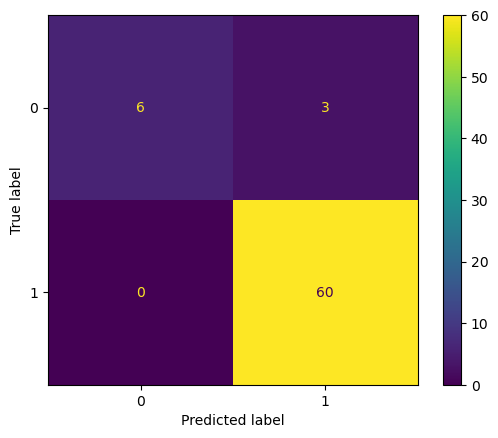

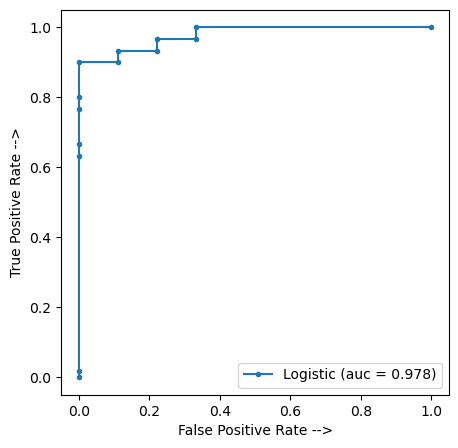

,Coefficients,Standard Errors,t values,Probabilities
0,-2.8155,0.300,-9.375,0.000
1,-0.2107,0.043,-4.916,0.000
2,-0.6712,0.022,-30.698,0.000
3,0.8345,0.220,3.789,0.000
4,0.3512,0.140,2.515,0.015
5,0.7563,0.021,35.706,0.000
6,-0.7466,0.038,-19.477,0.000
7,0.4014,0.089,4.490,0.000
8,0.6342,0.141,4.505,0.000
9,0.6600,0.141,4.685,0.000


In [194]:
train_dataset, test_dataset = break_to_sets(best_l, select_cols)
train_data, train_label = train_dataset[:, :-1], train_dataset[:, -1]
test_data, test_label = test_dataset[:, :-1], test_dataset[:, -1]
clf = LogisticRegression(max_iter=1000)
model = RFE(clf, n_features_to_select=best_q, step=1)
reduce_train_data = model.fit_transform(train_data, train_label)
model.fit(train_data, train_label)
y_pred = model.predict(train_data)
cm = confusion_matrix(train_label, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

y_pred_logistic = model.decision_function(train_data)
logistic_fpr, logistic_tpr, threshold = roc_curve(train_label, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

# Calculate p-values
params = np.append(model.estimator_.intercept_,model.estimator_.coef_)
predictions = model.estimator_.predict(reduce_train_data)
newX = np.append(np.ones((len(reduce_train_data),1)), reduce_train_data, axis=1)
MSE = (sum((train_label-predictions)**2))/(len(newX)-len(newX[0]))
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)
df = pd.DataFrame()
df["Coefficients"],df["Standard Errors"],df["t values"],df["Probabilities"] = [params,sd_b,ts_b,p_values]
display(df)

## (v)

In [195]:
test_acc = model.score(test_data, test_label)
print(f"Test accuracy: {test_acc}")

Test accuracy: 0.8421052631578947


## Q: Compare the accuracy on the test set with the cross-validation accuracy you obtained previously <br>
Ans: Test accuracy on test set = 84.42%. Best cross-validation accuracy on training set = 89.89%

## (vi)

## Q: Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters? <br>
Ans: Yes, since if I didn't set the maximum iteration for the logistic regression model, it would be hard to converge, and the abs(beta) would keep growing.


## (vii)

## Q: From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model. <br>
Ans: Yes


Original beta_not:  [-2.81554684]
Case-control sampling beta_not:  [-0.91842686]


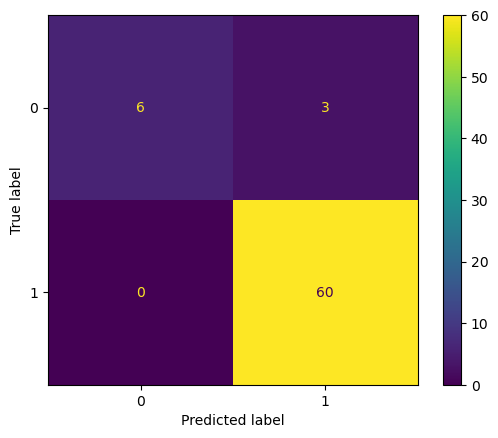

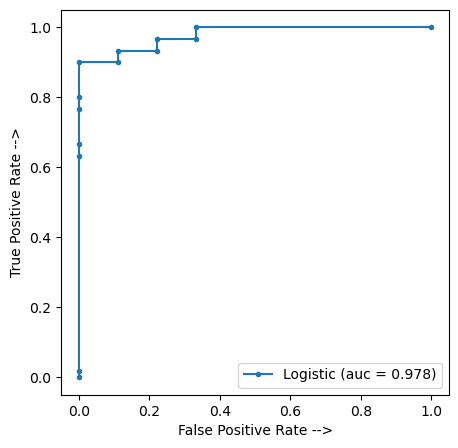

In [196]:
# Case-control sampling, assume real world data is 50%-50% balanced
print("Original beta_not: ", model.estimator_.intercept_)
model.estimator_.intercept_ = model.estimator_.intercept_ - math.log((9 / 69) / (1 - 9 / 69)) + math.log(1)
print("Case-control sampling beta_not: ", model.estimator_.intercept_)
model.fit(train_data, train_label)
y_pred = model.predict(train_data)
cm = confusion_matrix(train_label, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

y_pred_logistic = model.decision_function(train_data)
logistic_fpr, logistic_tpr, threshold = roc_curve(train_label, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

## (b)

## (i)

In [197]:
def break_to_normalized_sets(set_amount, select_cols, binary=True):
    train_dataset = []
    test_dataset = []
    
    for dir, label in dir_type_list.items():
        if label != 0 and binary: label = 1
        for filename in glob.glob(os.path.join(dir, "*.csv")):
            cur_data_sample = []
            if filename in test_list:
                data_type = 'test'
            else:
                data_type = 'train'
            cur_df = pd.read_csv(filename, sep=r',| ', skiprows=5, names=col_names, engine='python').drop('time', axis=1).iloc[:, select_cols]
            for column in cur_df.columns: 
                cur_df[column] = (cur_df[column] - cur_df[column].min()) / (cur_df[column].max() - cur_df[column].min())
            row_size = len(cur_df)
            portion_size = row_size // set_amount
            start = 0
            for _ in range(set_amount):
                end = start + portion_size
                if end > row_size:
                    end = row_size
                cur_portion = cur_df.iloc[start:end].describe().dropna().drop('count', axis=0).drop('max', axis=0).drop('min', axis=0).drop('mean', axis=0).drop('75%', axis=0).transpose().values.tolist()
                for features in cur_portion:
                    cur_data_sample.extend(features)
                    if len(features) != 3:
                        print(len(features))
                        print(features)
                        print(cur_portion)
                        display(cur_df.iloc[start:end])
                        display(cur_df.iloc[start:end].describe().transpose())
                start = end

            cur_data_sample.extend([label])
            if data_type == 'test':
                test_dataset.append(cur_data_sample)
            else:
                train_dataset.append(cur_data_sample)
                
    return np.array(train_dataset), np.array(test_dataset)

In [198]:
set_amounts = [i for i in range(1, 21, 1)]
select_cols = [0, 1, 5]
best_l = None
best_acc = float('-inf')
for set_amount in set_amounts:
    sample_size = len(select_cols) * 3 * set_amount
    train_dataset, test_dataset = break_to_normalized_sets(set_amount, select_cols)
    train_data, train_label = train_dataset[:, :-1], train_dataset[:, -1]
    
    # Lasso (L1 penalized)
    model = LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter=1000)
    model.fit(train_data, train_label)

    # Cross Validation --> analyze model
    skf = StratifiedKFold(n_splits=5)
    acc_stratified = []
    for train_index, test_index in skf.split(train_data, train_label):
        x_train_fold, x_test_fold = train_data[train_index], train_data[test_index]
        y_train_fold, y_test_fold = train_label[train_index], train_label[test_index]
        model.fit(x_train_fold, y_train_fold)
        acc_stratified.append(model.score(x_test_fold, y_test_fold))
    cur_acc = mean(acc_stratified)

    # score = rfecv.score(test_data, test_label)
    if cur_acc > best_acc:
        best_l = set_amount
        best_acc = cur_acc
        print(f"Current l: {best_l}")
        print(f"Current accuracy: {cur_acc}")

print(f"Best l: {best_l}, Cross-validation accuracy: {best_acc}")

Current l: 1
Current accuracy: 0.8703296703296703
Best l: 1, Cross-validation accuracy: 0.8703296703296703


In [199]:
train_dataset, test_dataset = break_to_normalized_sets(best_l, select_cols)
train_data, train_label = train_dataset[:, :-1], train_dataset[:, -1]
test_data, test_label = test_dataset[:, :-1], test_dataset[:, -1]
model = LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter=1000)
model.fit(train_data, train_label)
test_acc = model.score(test_data, test_label)
print(f"Lasso test accuracy: {test_acc}")

Lasso test accuracy: 0.7894736842105263


## (ii)

## Q: Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement? <br>
Ans: Variable selection performs better (84% > 78%). But L1-penalized is easier to implement.

## (c)

## (i)

In [200]:
set_amounts = [i for i in range(1, 21, 1)]
select_cols = [0, 1, 5]
best_l = None
best_acc = float('-inf')
for set_amount in set_amounts:
    sample_size = len(select_cols) * 3 * set_amount
    train_dataset, test_dataset = break_to_normalized_sets(set_amount, select_cols, binary=False)
    train_data, train_label = train_dataset[:, :-1], train_dataset[:, -1]
    
    # Lasso (L1 penalized)
    model = LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter=1000)
    model.fit(train_data, train_label)

    # Cross Validation --> analyze model
    skf = StratifiedKFold(n_splits=5)
    acc_stratified = []
    for train_index, test_index in skf.split(train_data, train_label):
        x_train_fold, x_test_fold = train_data[train_index], train_data[test_index]
        y_train_fold, y_test_fold = train_label[train_index], train_label[test_index]
        model.fit(x_train_fold, y_train_fold)
        acc_stratified.append(model.score(x_test_fold, y_test_fold))
    cur_acc = mean(acc_stratified)

    # score = rfecv.score(test_data, test_label)
    if cur_acc > best_acc:
        best_l = set_amount
        best_acc = cur_acc
        print(f"Current l: {best_l}")
        print(f"Current accuracy: {cur_acc}")

print(f"Best l: {best_l}, Cross-validation accuracy: {best_acc}")

Current l: 1
Current accuracy: 0.33406593406593404
Current l: 2
Current accuracy: 0.34725274725274724
Current l: 3
Current accuracy: 0.3637362637362637
Current l: 4
Current accuracy: 0.3912087912087912
Current l: 5
Current accuracy: 0.4208791208791209
Current l: 7
Current accuracy: 0.43626373626373627
Best l: 7, Cross-validation accuracy: 0.43626373626373627


Multi-class test accuracy: 0.42105263157894735


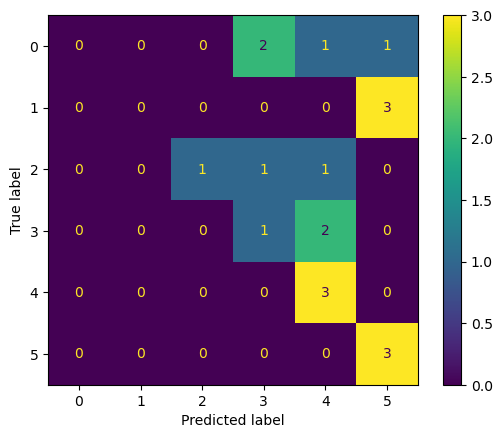

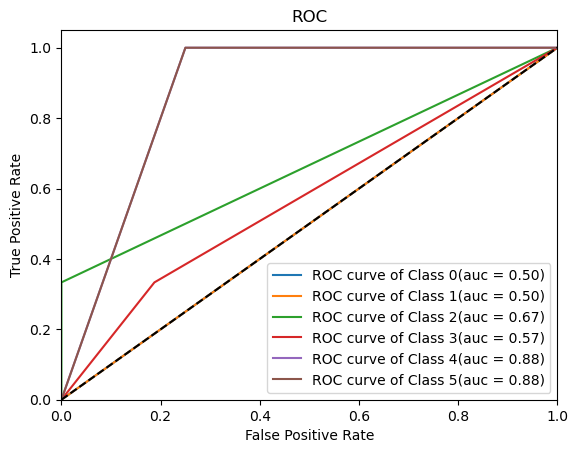

In [201]:
train_dataset, test_dataset = break_to_normalized_sets(best_l, select_cols, binary=False)
train_data, train_label = train_dataset[:, :-1], train_dataset[:, -1]
test_data, test_label = test_dataset[:, :-1], test_dataset[:, -1]
model = LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter=1000)
model.fit(train_data, train_label)
test_acc = model.score(test_data, test_label)
print(f"Multi-class test accuracy: {test_acc}")

# Confusion Matrix
y_pred = model.predict(test_data)
cm = confusion_matrix(test_label, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

# ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    new_y = deepcopy(test_label)
    for e in range(0, len(test_label)):
        if new_y[e] == i:
            new_y[e] = 1
        else:
            new_y[e] = 0
    new_best_test_prediction = deepcopy(y_pred)
    for e in range(0, len(y_pred)):
        if new_best_test_prediction[e] == i:
            new_best_test_prediction[e] = 1
        else:
            new_best_test_prediction[e] = 0

    fpr[i], tpr[i], _ = roc_curve(new_y, new_best_test_prediction)
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
for i in range(6):
    plt.plot(fpr[i], tpr[i], label='ROC curve of Class '+ str(i) +'(auc = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## (ii)

##  Gaussian

In [202]:
set_amounts = [i for i in range(1, 21, 1)]
select_cols = [0, 1, 5]
best_l = None
best_acc = float('-inf')
for set_amount in set_amounts:
    sample_size = len(select_cols) * 3 * set_amount
    train_dataset, test_dataset = break_to_normalized_sets(set_amount, select_cols, binary=False)
    train_data, train_label = train_dataset[:, :-1], train_dataset[:, -1]
    
    # Lasso (L1 penalized)
    model = GaussianNB()
    model.fit(train_data, train_label)

    # Cross Validation --> analyze model
    skf = StratifiedKFold(n_splits=5)
    acc_stratified = []
    for train_index, test_index in skf.split(train_data, train_label):
        x_train_fold, x_test_fold = train_data[train_index], train_data[test_index]
        y_train_fold, y_test_fold = train_label[train_index], train_label[test_index]
        model.fit(x_train_fold, y_train_fold)
        acc_stratified.append(model.score(x_test_fold, y_test_fold))
    cur_acc = mean(acc_stratified)

    # score = rfecv.score(test_data, test_label)
    if cur_acc > best_acc:
        best_l = set_amount
        best_acc = cur_acc
        print(f"Current l: {best_l}")
        print(f"Current accuracy: {cur_acc}")

print(f"Best l: {best_l}, Cross-validation accuracy: {best_acc}")


Current l: 1
Current accuracy: 0.7076923076923077
Best l: 1, Cross-validation accuracy: 0.7076923076923077


In [203]:
train_dataset, test_dataset = break_to_normalized_sets(best_l, select_cols, binary=False)
train_data, train_label = train_dataset[:, :-1], train_dataset[:, -1]
test_data, test_label = test_dataset[:, :-1], test_dataset[:, -1]
model = GaussianNB()
model.fit(train_data, train_label)
test_acc = model.score(test_data, test_label)
print(f"Naive Bayes Gaussian test accuracy: {test_acc}")

Naive Bayes Gaussian test accuracy: 0.631578947368421


##  Multinomial

In [204]:
set_amounts = [i for i in range(1, 21, 1)]
select_cols = [0, 1, 5]
best_l = None
best_acc = float('-inf')
for set_amount in set_amounts:
    sample_size = len(select_cols) * 3 * set_amount
    train_dataset, test_dataset = break_to_normalized_sets(set_amount, select_cols, binary=False)
    train_data, train_label = train_dataset[:, :-1], train_dataset[:, -1]
    
    # Lasso (L1 penalized)
    model = MultinomialNB()
    model.fit(train_data, train_label)

    # Cross Validation --> analyze model
    skf = StratifiedKFold(n_splits=5)
    acc_stratified = []
    for train_index, test_index in skf.split(train_data, train_label):
        x_train_fold, x_test_fold = train_data[train_index], train_data[test_index]
        y_train_fold, y_test_fold = train_label[train_index], train_label[test_index]
        model.fit(x_train_fold, y_train_fold)
        acc_stratified.append(model.score(x_test_fold, y_test_fold))
    cur_acc = mean(acc_stratified)

    # score = rfecv.score(test_data, test_label)
    if cur_acc > best_acc:
        best_l = set_amount
        best_acc = cur_acc
        print(f"Current l: {best_l}")
        print(f"Current accuracy: {cur_acc}")

print(f"Best l: {best_l}, Cross-validation accuracy: {best_acc}")


Current l: 1
Current accuracy: 0.3901098901098901
Current l: 4
Current accuracy: 0.4351648351648352
Current l: 5
Current accuracy: 0.43626373626373627
Current l: 7
Current accuracy: 0.44945054945054946
Current l: 8
Current accuracy: 0.46373626373626375
Current l: 9
Current accuracy: 0.47802197802197804
Current l: 11
Current accuracy: 0.49230769230769234
Current l: 14
Current accuracy: 0.5208791208791209
Best l: 14, Cross-validation accuracy: 0.5208791208791209


In [205]:
train_dataset, test_dataset = break_to_normalized_sets(best_l, select_cols, binary=False)
train_data, train_label = train_dataset[:, :-1], train_dataset[:, -1]
test_data, test_label = test_dataset[:, :-1], test_dataset[:, -1]
model = MultinomialNB()
model.fit(train_data, train_label)
test_acc = model.score(test_data, test_label)
print(f"Naive Bayes Multinomial test accuracy: {test_acc}")

Naive Bayes Multinomial test accuracy: 0.3684210526315789


## Q: Use both Gaussian and Multinomial priors and compare the results. <br>
Ans: Gaussian is better (63% > 36%).

## (iii)

## Q: Which method is better for multi-class classification in this problem? <br>
Ans: Gaussian Naive Bayes. (63% > 43%(L1-penalized) > 36% Multinomial)

## ISLR, 4.8.3 <br>


Eliminating the presumption of common variance terms among all K classes involves excluding the terms from equation (4.12) that remain constant regardless of the value of $k$.
  
  $$ C' = \frac{\frac{1}{\sqrt{2\pi}}}{\sum_l\pi_l\frac{1}{\sqrt{2\pi}\sigma_l}\exp(-1/2\sigma_l^2(x-\mu_l)^2)} $$
  
  Replacing $C'$ in (4.12) and taking logs:
  
  $$\begin{aligned}
  P_k(x) &= C'\frac{\pi_k}{\sigma_k}\exp(-\frac{1}{2\sigma^2}(x^2-2\mu_kx + \mu_k^2))\\
  \log(P_k(x)) &= -\frac{1}{2\sigma_k^2}x^2 + \frac{\mu_kx}{\sigma_k^2} - \frac{\mu_k^2}{2\sigma_k^2} + \log(\frac{\pi_k}{\sigma_k}) + \log(C')      
  \end{aligned}$$
  
  Based on the presence of $x^2$ in the final term, the discriminant is quadratic.

## ISLR 4.8.7 <br>

$$\begin{aligned}
P(Y=yes|X=4) &= \frac{\pi_{yes}f_{yes}(x)}{\sum_{l=1}^K \pi_lf_l(x)} = \frac{\pi_{yes}\exp(-1/2\sigma^2(x-\mu_{yes})^2)}{\sum_{l=1}^K\pi_l\exp(-1/2\sigma^2(x-\mu_l)^2)}\\
P(Y=yes|X=4) &= \frac{0.8\times\exp(-0.5)}{0.8\times\exp(-0.5) + 0.2\times\exp(-16/72)}\\
P(Y=yes|X=4) &= 0.75
\end{aligned}$$